# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/Study-AI/step3')
sys.path.append('/content/drive/My Drive/Study-AI/step3/lesson_2')

# optimizer

## SGD

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1974
Generation: 20. 正答率(トレーニング) = 0.22
                : 20. 正答率(テスト) = 0.2307
Generation: 30. 正答率(トレーニング) = 0.35
                : 30. 正答率(テスト) = 0.3265
Generation: 40. 正答率(トレーニング) = 0.35
                : 40. 正答率(テスト) = 0.3803
Generation: 50. 正答率(トレーニング) = 0.29
                : 50. 正答率(テスト) = 0.3849
Generation: 60. 正答率(トレーニング) = 0.31
                : 60. 正答率(テスト) = 0.3634
Generation: 70. 正答率(トレーニング) = 0.43
                : 70. 正答率(テスト) = 0.3624
Generation: 80. 正答率(トレーニング) = 0.38
                : 80. 正答率(テスト) = 0.3697
Generation: 90. 正答率(トレーニング) = 0.34
                : 90. 正答率(テスト) = 0.3642
Generation: 100. 正答率(トレーニング) = 0.35
                : 100. 正答率(テスト) = 0.3653
Generation: 110. 正答率(トレーニング) = 0.34
                : 110. 正答率(テスト) = 0.3598
Generation: 120. 正答率(トレーニング) = 0.36
                : 120. 正答率(テスト) = 0.343
Generation: 130. 正答率(トレーニング) = 0.34
                : 130. 正答率(テスト) = 0.3496
Generati

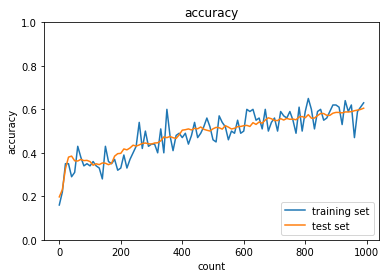

In [4]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 考察
- SGDでは学習が進まない
- バッチ正規化を適用すると少し改善するが正答率は低い

## Momentum

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.0982
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.0974
Generation: 30. 正答率(トレーニング) = 0.09
                : 30. 正答率(テスト) = 0.0892
Generation: 40. 正答率(トレーニング) = 0.09
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.11
                : 50. 正答率(テスト) = 0.101
Generation: 60. 正答率(トレーニング) = 0.09
                : 60. 正答率(テスト) = 0.1028
Generation: 70. 正答率(トレーニング) = 0.09
                : 70. 正答率(テスト) = 0.1176
Generation: 80. 正答率(トレーニング) = 0.14
                : 80. 正答率(テスト) = 0.1763
Generation: 90. 正答率(トレーニング) = 0.28
                : 90. 正答率(テスト) = 0.2674
Generation: 100. 正答率(トレーニング) = 0.27
                : 100. 正答率(テスト) = 0.2192
Generation: 110. 正答率(トレーニング) = 0.18
                : 110. 正答率(テスト) = 0.2107
Generation: 120. 正答率(トレーニング) = 0.3
                : 120. 正答率(テスト) = 0.2172
Generation: 130. 正答率(トレーニング) = 0.25
                : 130. 正答率(テスト) = 0.2879
Generatio

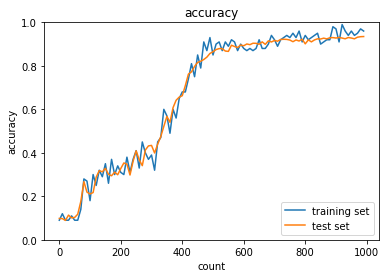

In [5]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.3
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 考察
- 慣性項を取り入れるモメンタムでは学習が一気に進む場合がある
- 極小値に注意しなければならない

## AdaGrad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14
                : 10. 正答率(テスト) = 0.1327
Generation: 20. 正答率(トレーニング) = 0.17
                : 20. 正答率(テスト) = 0.1334
Generation: 30. 正答率(トレーニング) = 0.2
                : 30. 正答率(テスト) = 0.215
Generation: 40. 正答率(トレーニング) = 0.19
                : 40. 正答率(テスト) = 0.2121
Generation: 50. 正答率(トレーニング) = 0.3
                : 50. 正答率(テスト) = 0.2118
Generation: 60. 正答率(トレーニング) = 0.23
                : 60. 正答率(テスト) = 0.2003
Generation: 70. 正答率(トレーニング) = 0.27
                : 70. 正答率(テスト) = 0.2197
Generation: 80. 正答率(トレーニング) = 0.21
                : 80. 正答率(テスト) = 0.2167
Generation: 90. 正答率(トレーニング) = 0.22
                : 90. 正答率(テスト) = 0.2137
Generation: 100. 正答率(トレーニング) = 0.21
                : 100. 正答率(テスト) = 0.2224
Generation: 110. 正答率(トレーニング) = 0.23
                : 110. 正答率(テスト) = 0.2213
Generation: 120. 正答率(トレーニング) = 0.27
                : 120. 正答率(テスト) = 0.2578
Generation: 130. 正答率(トレーニング) = 0.2
                : 130. 正答率(テスト) = 0.2698
Generation:

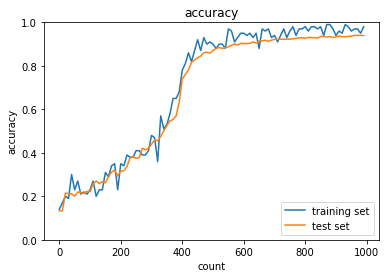

In [6]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.full_like(network.params[key], 1e-4)
        else:
            h[key] += np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]))

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSprop

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.06
                : 30. 正答率(テスト) = 0.1009
Generation: 40. 正答率(トレーニング) = 0.12
                : 40. 正答率(テスト) = 0.0958
Generation: 50. 正答率(トレーニング) = 0.08
                : 50. 正答率(テスト) = 0.0969
Generation: 60. 正答率(トレーニング) = 0.12
                : 60. 正答率(テスト) = 0.1539
Generation: 70. 正答率(トレーニング) = 0.18
                : 70. 正答率(テスト) = 0.1985
Generation: 80. 正答率(トレーニング) = 0.23
                : 80. 正答率(テスト) = 0.2171
Generation: 90. 正答率(トレーニング) = 0.3
                : 90. 正答率(テスト) = 0.3066
Generation: 100. 正答率(トレーニング) = 0.38
                : 100. 正答率(テスト) = 0.37
Generation: 110. 正答率(トレーニング) = 0.56
                : 110. 正答率(テスト) = 0.5189
Generation: 120. 正答率(トレーニング) = 0.67
                : 120. 正答率(テスト) = 0.603
Generation: 130. 正答率(トレーニング) = 0.65
                : 130. 正答率(テスト) = 0.6604
Generation:

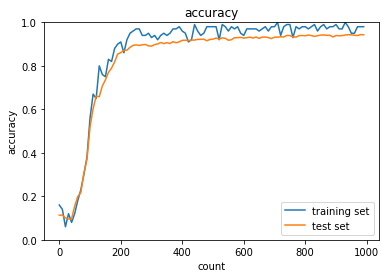

In [8]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 考察
- RMSpropではバッチ正規化なしでも学習速度がかなり改善された
- 若干だが過学習の兆候が見られる

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.32
                : 10. 正答率(テスト) = 0.3516
Generation: 20. 正答率(トレーニング) = 0.51
                : 20. 正答率(テスト) = 0.5125
Generation: 30. 正答率(トレーニング) = 0.75
                : 30. 正答率(テスト) = 0.7076
Generation: 40. 正答率(トレーニング) = 0.68
                : 40. 正答率(テスト) = 0.6997
Generation: 50. 正答率(トレーニング) = 0.71
                : 50. 正答率(テスト) = 0.7401
Generation: 60. 正答率(トレーニング) = 0.69
                : 60. 正答率(テスト) = 0.7398
Generation: 70. 正答率(トレーニング) = 0.74
                : 70. 正答率(テスト) = 0.7606
Generation: 80. 正答率(トレーニング) = 0.75
                : 80. 正答率(テスト) = 0.7761
Generation: 90. 正答率(トレーニング) = 0.81
                : 90. 正答率(テスト) = 0.7919
Generation: 100. 正答率(トレーニング) = 0.79
                : 100. 正答率(テスト) = 0.8399
Generation: 110. 正答率(トレーニング) = 0.85
                : 110. 正答率(テスト) = 0.8436
Generation: 120. 正答率(トレーニング) = 0.86
                : 120. 正答率(テスト) = 0.8299
Generation: 130. 正答率(トレーニング) = 0.86
                : 130. 正答率(テスト) = 0.8429
Generat

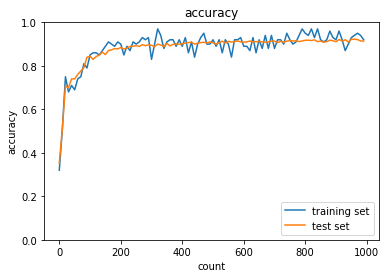

In [9]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 考察
- 学習の速度はRMSpropの方が早いが、最も安定した結果となった
- バッチ正規化も取り入れると、学習も早く正解率も高い